In [1]:
import os
import sys



import pandas as pd
import numpy as np
import keras as ks
import tensorflow as tf
#import cntk as c
from IPython.display import clear_output
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras import losses
%matplotlib inline  

np.random.seed(70)
back_end = ks.backend.backend()

#got to chart the prediction, 'labels' for those in Lutz, Fl.
import matplotlib
#http://matplotlib.org/faq/howto_faq.html#matplotlib-in-a-web-application-server
#matplotlib.use('Agg') #uncomment this if using on a web service with no grahics screen, ie headless.
import matplotlib.pyplot as plt

#Last Tested With:
# Python version: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
# Numpy version: 1.15.4
# Matplotlib version: 3.0.2
# Keras version: 2.2.4
# Tensorflow version: 1.13.1


# Lets know what versions we are working with now.
print("\n") #newline
print("Python version: {}".format(sys.version))
print("Numpy version: {}".format(np.version.version))
print("Matplotlib version: {}".format(matplotlib.__version__))
print("Keras version: {}".format(ks.__version__))
print("Tensorflow version: {}".format(tf.__version__))
#print("CNTK version: {}".format(c.__version__))
print("\n") #newline

Using TensorFlow backend.




Python version: 3.7.1 (default, Dec 10 2018, 22:54:23) [MSC v.1915 64 bit (AMD64)]
Numpy version: 1.15.4
Matplotlib version: 3.0.2
Keras version: 2.2.4
Tensorflow version: 1.13.1




In [2]:
##########################  Create Sine Waves Data Frame ############################
#only certain combinations will result in all 4 waves being generated correctly.
#odd numbers for f, best to have Fs and sample the same.
frequencey = 80
sample = 1600
f = 3

z = np.arange(sample)
zero = np.sin(2 * np.pi * f * z / frequencey)
zero = (zero - np.max(zero))/-np.ptp(zero)

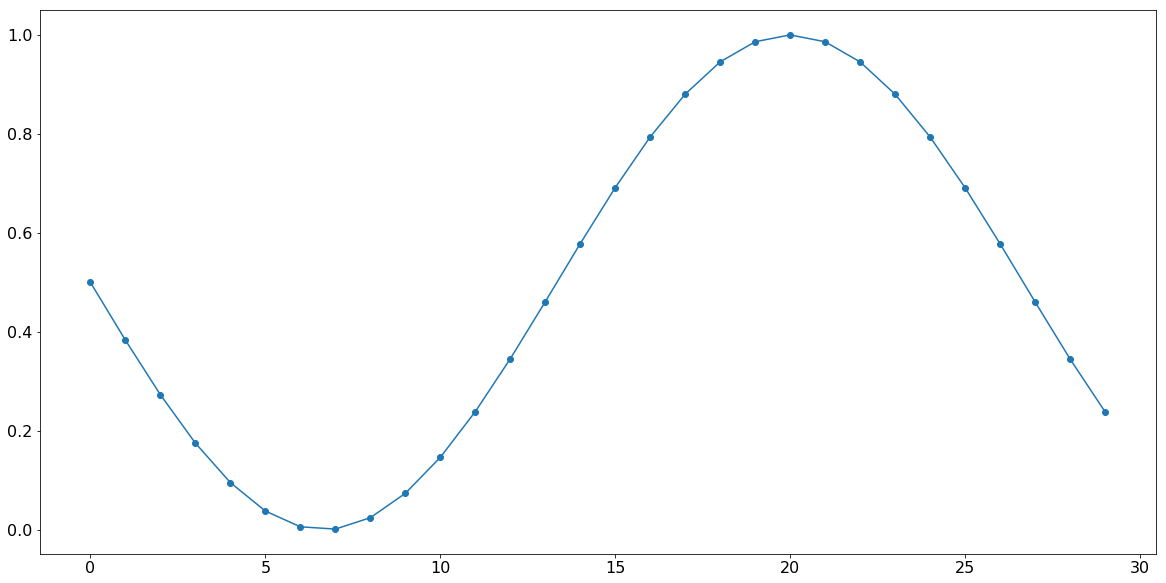

In [19]:
plt.figure(figsize=(20,10))
plt.plot(zero[0:30],"-o")


In [4]:
len(zero)

1600

In [5]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)
#X,Y = split_sequence(zero,50)

In [20]:
n_steps = 30
from keras.layers import LSTM
# split into samples
X, y = split_sequence(zero, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [21]:
len(X)

1570

In [22]:

# updatable plot
# a minimal example (sort of)

class PlotLosses(ks.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1
        
        clear_output(wait=True)
        plt.figure(figsize=(20,10))
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.ylabel("loss")
        plt.xlabel("epoch")
        plt.title("The final validation loss")        
        plt.legend()
        matplotlib.rcParams.update({'font.size': 16})
        plt.show();
        
plot_losses = PlotLosses()

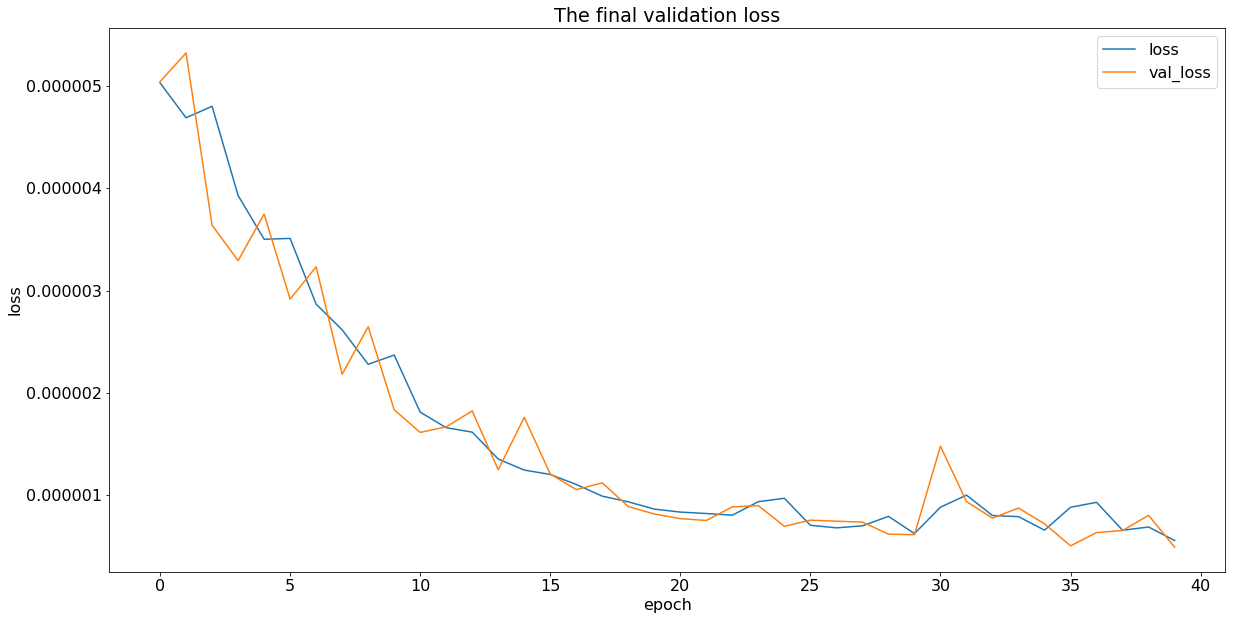

In [30]:
# fit model
hist =model.fit(X[0:1200], y[0:1200], epochs=40, verbose=1,
                validation_data=(X[1200:1300], y[1200:1300]),callbacks=[plot_losses])


In [31]:
# demonstrate prediction
x_input = X[1301:1400]
#x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

In [32]:
ydiff = (y[1301:1400]-yhat.ravel())/y[1301:1400]
#ydiff = (y[1301:1400]-yhat.ravel())


D:\Mysoftwares\anaconda\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


<Figure size 1440x720 with 0 Axes>

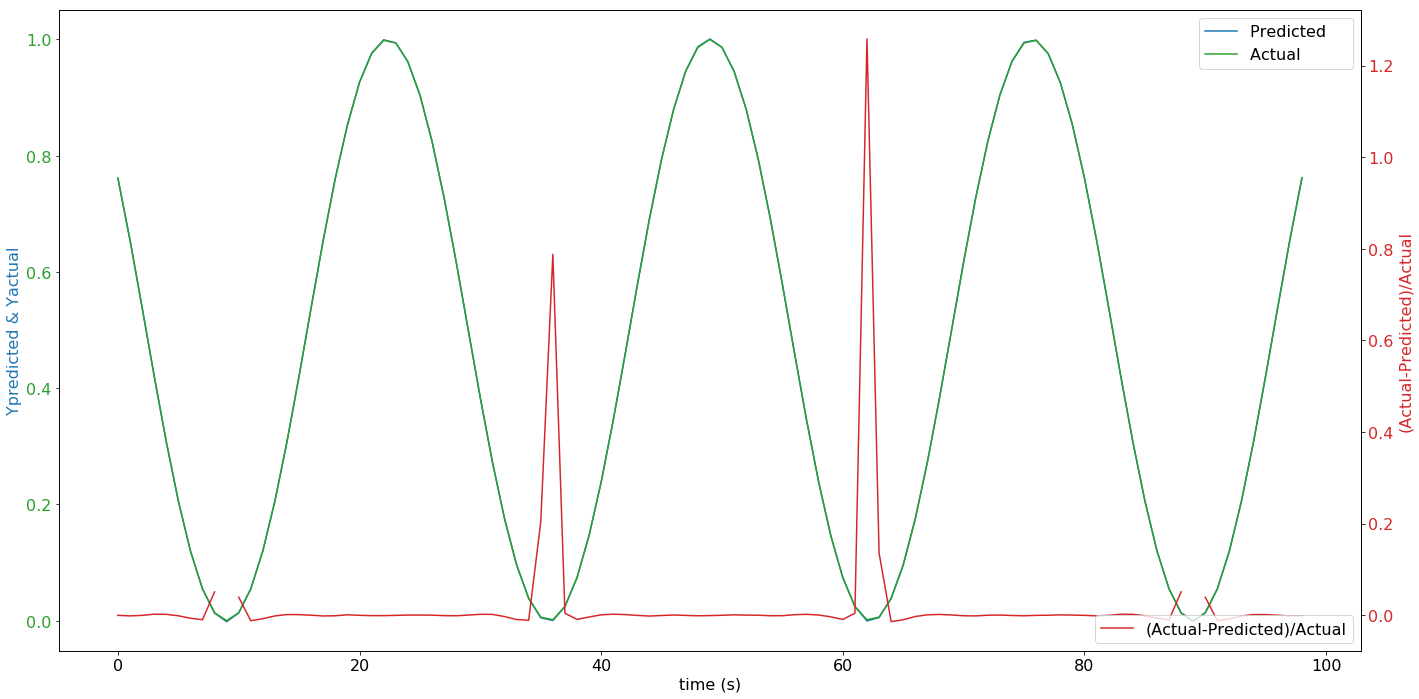

In [33]:
plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots(figsize=(20,10))
matplotlib.rcParams.update({'font.size': 16})
color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Ypredicted & Yactual', color=color)

ax1.plot(yhat, color=color,label = "Predicted    ")
color = 'tab:green'
ax1.plot(y[1301:1400],color = color, label = "Actual    ")
ax1.tick_params(axis='y', labelcolor=color,)
ax1.legend()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('(Actual-Predicted)/Actual', color=color)  # we already handled the x-label with ax1
ax2.plot(ydiff, color=color,label = "(Actual-Predicted)/Actual")
ax2.tick_params(axis='y', labelcolor=color,)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax2.legend(loc=4)
plt.show()


In [51]:
y[1301:1400]

array([ 0.76124928,  0.6545085 ,  0.53922955,  0.42178277,  0.30865828,
        0.20610737,  0.11979702,  0.05449674,  0.01381504, -0.        ,
        0.01381504,  0.05449674,  0.11979702,  0.20610737,  0.30865828,
        0.42178277,  0.53922955,  0.6545085 ,  0.76124928,  0.85355339,
        0.92632008,  0.97552826,  0.99845867,  0.99384417,  0.96193977,
        0.9045085 ,  0.82472402,  0.72699525,  0.61672268,  0.5       ,
        0.38327732,  0.27300475,  0.17527598,  0.0954915 ,  0.03806023,
        0.00615583,  0.00154133,  0.02447174,  0.07367992,  0.14644661,
        0.23875072,  0.3454915 ,  0.46077045,  0.57821723,  0.69134172,
        0.79389263,  0.88020298,  0.94550326,  0.98618496,  1.        ,
        0.98618496,  0.94550326,  0.88020298,  0.79389263,  0.69134172,
        0.57821723,  0.46077045,  0.3454915 ,  0.23875072,  0.14644661,
        0.07367992,  0.02447174,  0.00154133,  0.00615583,  0.03806023,
        0.0954915 ,  0.17527598,  0.27300475,  0.38327732,  0.5 

In [57]:
# demonstrate prediction
x_input = X[1301:1400]
ncount = 0
ypred_val = []
for n_x in x_input:
    n_x = n_x.reshape(1,30,1)
    yhat = model.predict(n_x, verbose=0)
    ypred_val.append(yhat.ravel()[0])
    if ncount >30:
        print(yhat,y[1300+ncount+1])
    ncount = ncount+1
ypred_val

[[0.27249658]] 0.2730047501302183
[[0.17577006]] 0.17527597583492627
[[0.09638872]] 0.09549150281252633
[[0.0384734]] 0.03806023374435841
[[0.00489969]] 0.006155829702432614
[[0.00032686]] 0.0015413331334349079
[[0.02436752]] 0.024471741852426232
[[0.07434139]] 0.07367991782295652
[[0.14700577]] 0.1464466094067064
[[0.23852499]] 0.23875071764202188
[[0.34470788]] 0.3454915028125177
[[0.4600995]] 0.46077045213606393
[[0.5784365]] 0.5782172325200974
[[0.6925409]] 0.6913417161825499
[[0.79431164]] 0.7938926261462371
[[0.8797337]] 0.880202982800013
[[0.9458132]] 0.9455032620941801
[[0.98731565]] 0.9861849601988418
[[1.0007224]] 1.0
[[0.9863033]] 0.9861849601988435
[[0.9446684]] 0.9455032620941834
[[0.87996423]] 0.8802029828000177
[[0.79382324]] 0.7938926261462431
[[0.69206536]] 0.6913417161825567
[[0.5787717]] 0.5782172325201046
[[0.46020836]] 0.4607704521360996
[[0.34479854]] 0.3454915028125247
[[0.23862791]] 0.23875071764202815
[[0.14694682]] 0.1464466094067317
[[0.07435903]] 0.073679917

[0.7614049,
 0.65540564,
 0.53938186,
 0.42081156,
 0.30803132,
 0.20634402,
 0.12056748,
 0.055030305,
 0.013109939,
 -0.0016809292,
 0.0132709965,
 0.055153303,
 0.120697394,
 0.20641127,
 0.30819413,
 0.42121154,
 0.5391892,
 0.655499,
 0.762095,
 0.85268986,
 0.9265022,
 0.9763179,
 0.99933505,
 0.9941038,
 0.9615735,
 0.90406346,
 0.82457566,
 0.72758317,
 0.61742306,
 0.4998127,
 0.38247296,
 0.27249658,
 0.17577006,
 0.09638872,
 0.038473397,
 0.00489969,
 0.00032686442,
 0.024367519,
 0.074341394,
 0.14700577,
 0.23852499,
 0.34470788,
 0.4600995,
 0.5784365,
 0.6925409,
 0.79431164,
 0.8797337,
 0.9458132,
 0.98731565,
 1.0007224,
 0.9863033,
 0.9446684,
 0.87996423,
 0.79382324,
 0.69206536,
 0.5787717,
 0.46020836,
 0.34479854,
 0.23862791,
 0.14694682,
 0.07435903,
 0.024362879,
 -0.00039752945,
 0.0053187124,
 0.038593233,
 0.096432015,
 0.1757515,
 0.2727548,
 0.38260162,
 0.49970037,
 0.61739314,
 0.72804666,
 0.8246139,
 0.904179,
 0.9624424,
 0.99498594,
 0.99872017,
 

In [49]:
x_input[0][0:2],x_input[1][0:2]

(array([[0.98618496],
        [0.94550326]]), array([[0.94550326],
        [0.88020298]]))

In [27]:
model.weights

[<tf.Variable 'lstm_2/kernel:0' shape=(1, 200) dtype=float32_ref>,
 <tf.Variable 'lstm_2/recurrent_kernel:0' shape=(50, 200) dtype=float32_ref>,
 <tf.Variable 'lstm_2/bias:0' shape=(200,) dtype=float32_ref>,
 <tf.Variable 'dense_2/kernel:0' shape=(50, 1) dtype=float32_ref>,
 <tf.Variable 'dense_2/bias:0' shape=(1,) dtype=float32_ref>]

In [29]:
for layer in model.layers:
    g=layer.get_config()
    
    h=layer.get_weights()
    print (len(h[0]))
    print(h[0])
    #print (h)    
#     weights = layer.get_weights() # list of numpy arrays
#     print("weights")

1
[[-0.06460344  0.08374389 -0.01985778  0.12621087 -0.1910852  -0.11638235
  -0.0271303   0.10117386  0.01735944  0.13402374 -0.144327   -0.1120494
   0.1144292  -0.08690809  0.02239357  0.09579121 -0.18096687  0.0167717
  -0.02236919 -0.19015788  0.01953991 -0.09166863  0.01500658 -0.07250095
  -0.08115142 -0.04471168 -0.10224675  0.05031541 -0.03109445  0.04787025
   0.00464068 -0.03649608  0.1442912   0.00528418 -0.10807008 -0.0388458
   0.11564174  0.20999777  0.11069393 -0.1333618  -0.14954565  0.07066071
   0.08474943 -0.05910927  0.19604316 -0.14896639  0.01852225  0.17272136
   0.02074173 -0.09515392  0.02790441  0.10565094 -0.00257416  0.11970074
   0.007735    0.02664917  0.06375698 -0.1268688  -0.14228243  0.20584731
   0.10457101  0.14036123  0.13452771  0.08497564  0.01949963  0.02570649
  -0.1785602   0.19155595  0.06848621 -0.00290355  0.10077158 -0.02032834
   0.12393758  0.20398936 -0.00475663 -0.12109157 -0.12229354  0.07604628
  -0.15804048  0.1848852   0.13805917 -

In [17]:
kk = h[1]

In [18]:
kk.shape

(1,)